
# Project: Investigate a Dataset - [No_ show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This report tries to analyse the reason why patients dont show up for their appointments after scheduling one and providing possible solutions the hospitals can consider in improvoing their revenue.

> Dataset used for this project was collected from Kaggle the dataset contains 110k medical appointments in Brazil, collected in May/June 2016 and its focused on characteristics of patients as well as their presence or absence from scheduled medical appointments. The dataset is made up of 14 unique variables.

> PatientId = Identification of a patient

> AppointmentID = Identification of each appointment

> Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

> AppointmentDay = The day of the actual appointment, when they have to visit the doctor.

> ScheduledDay = The day someone called or registered the appointment, this is before appointment of course.

> Age = How old is the patient.

> Neighbourhood = Where the appointment takes place.

> Scholarship = True of False 

> Hipertension = True or False

> Diabetes = True or False

> Alcoholism = True or False

> Handcap = True or False

> SMS_received = 1 or more messages sent to the patient

> No-show = True or False


> Identifying factors responsible to no-show will definitely help Hospital better determine types of scheduled appointments to plan for and provide incentives that enables patient show up for their appointments. 


### Question(s) for Analysis

>- Is alcohol drinking responsible for missing out on appointments?

>- Which Neighborhood recorded the most appointment?

>- Do the duration between registration and appointment affect the ability to show up?

>- Male or Female. which is more likely to show up for Appointment?

>- Do age influence the ability to show up for appointments?

In [1]:
# Import all packages required.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
% config InlineBackend.figure_format= 'retina'

<a id='wrangling'></a>
## Data Wrangling



### General Properties
> Data is loaded and its structure is accessed. The shape of the dataset is determined and inspections are made to detect error in datatype, missing values or Duplicate values.

In [2]:
# Loading the dataset

df_data= pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
#Inspect the first Five rows of the dataset.

df_data.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
#Inspect dataset for number of rows and features.

df_data.shape

(110527, 14)

In [5]:
#Inspect feature attributes.

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Inspect dataset for duplicates.

df_data.duplicated().sum()

0

In [7]:
#Inspect dataset for NaN (Null) values.

df_data.isnull().sum().any()

False

In [8]:
#Inspect dataset for unique values of features.

df_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
#Inspect the dataset statistics.

df_data.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

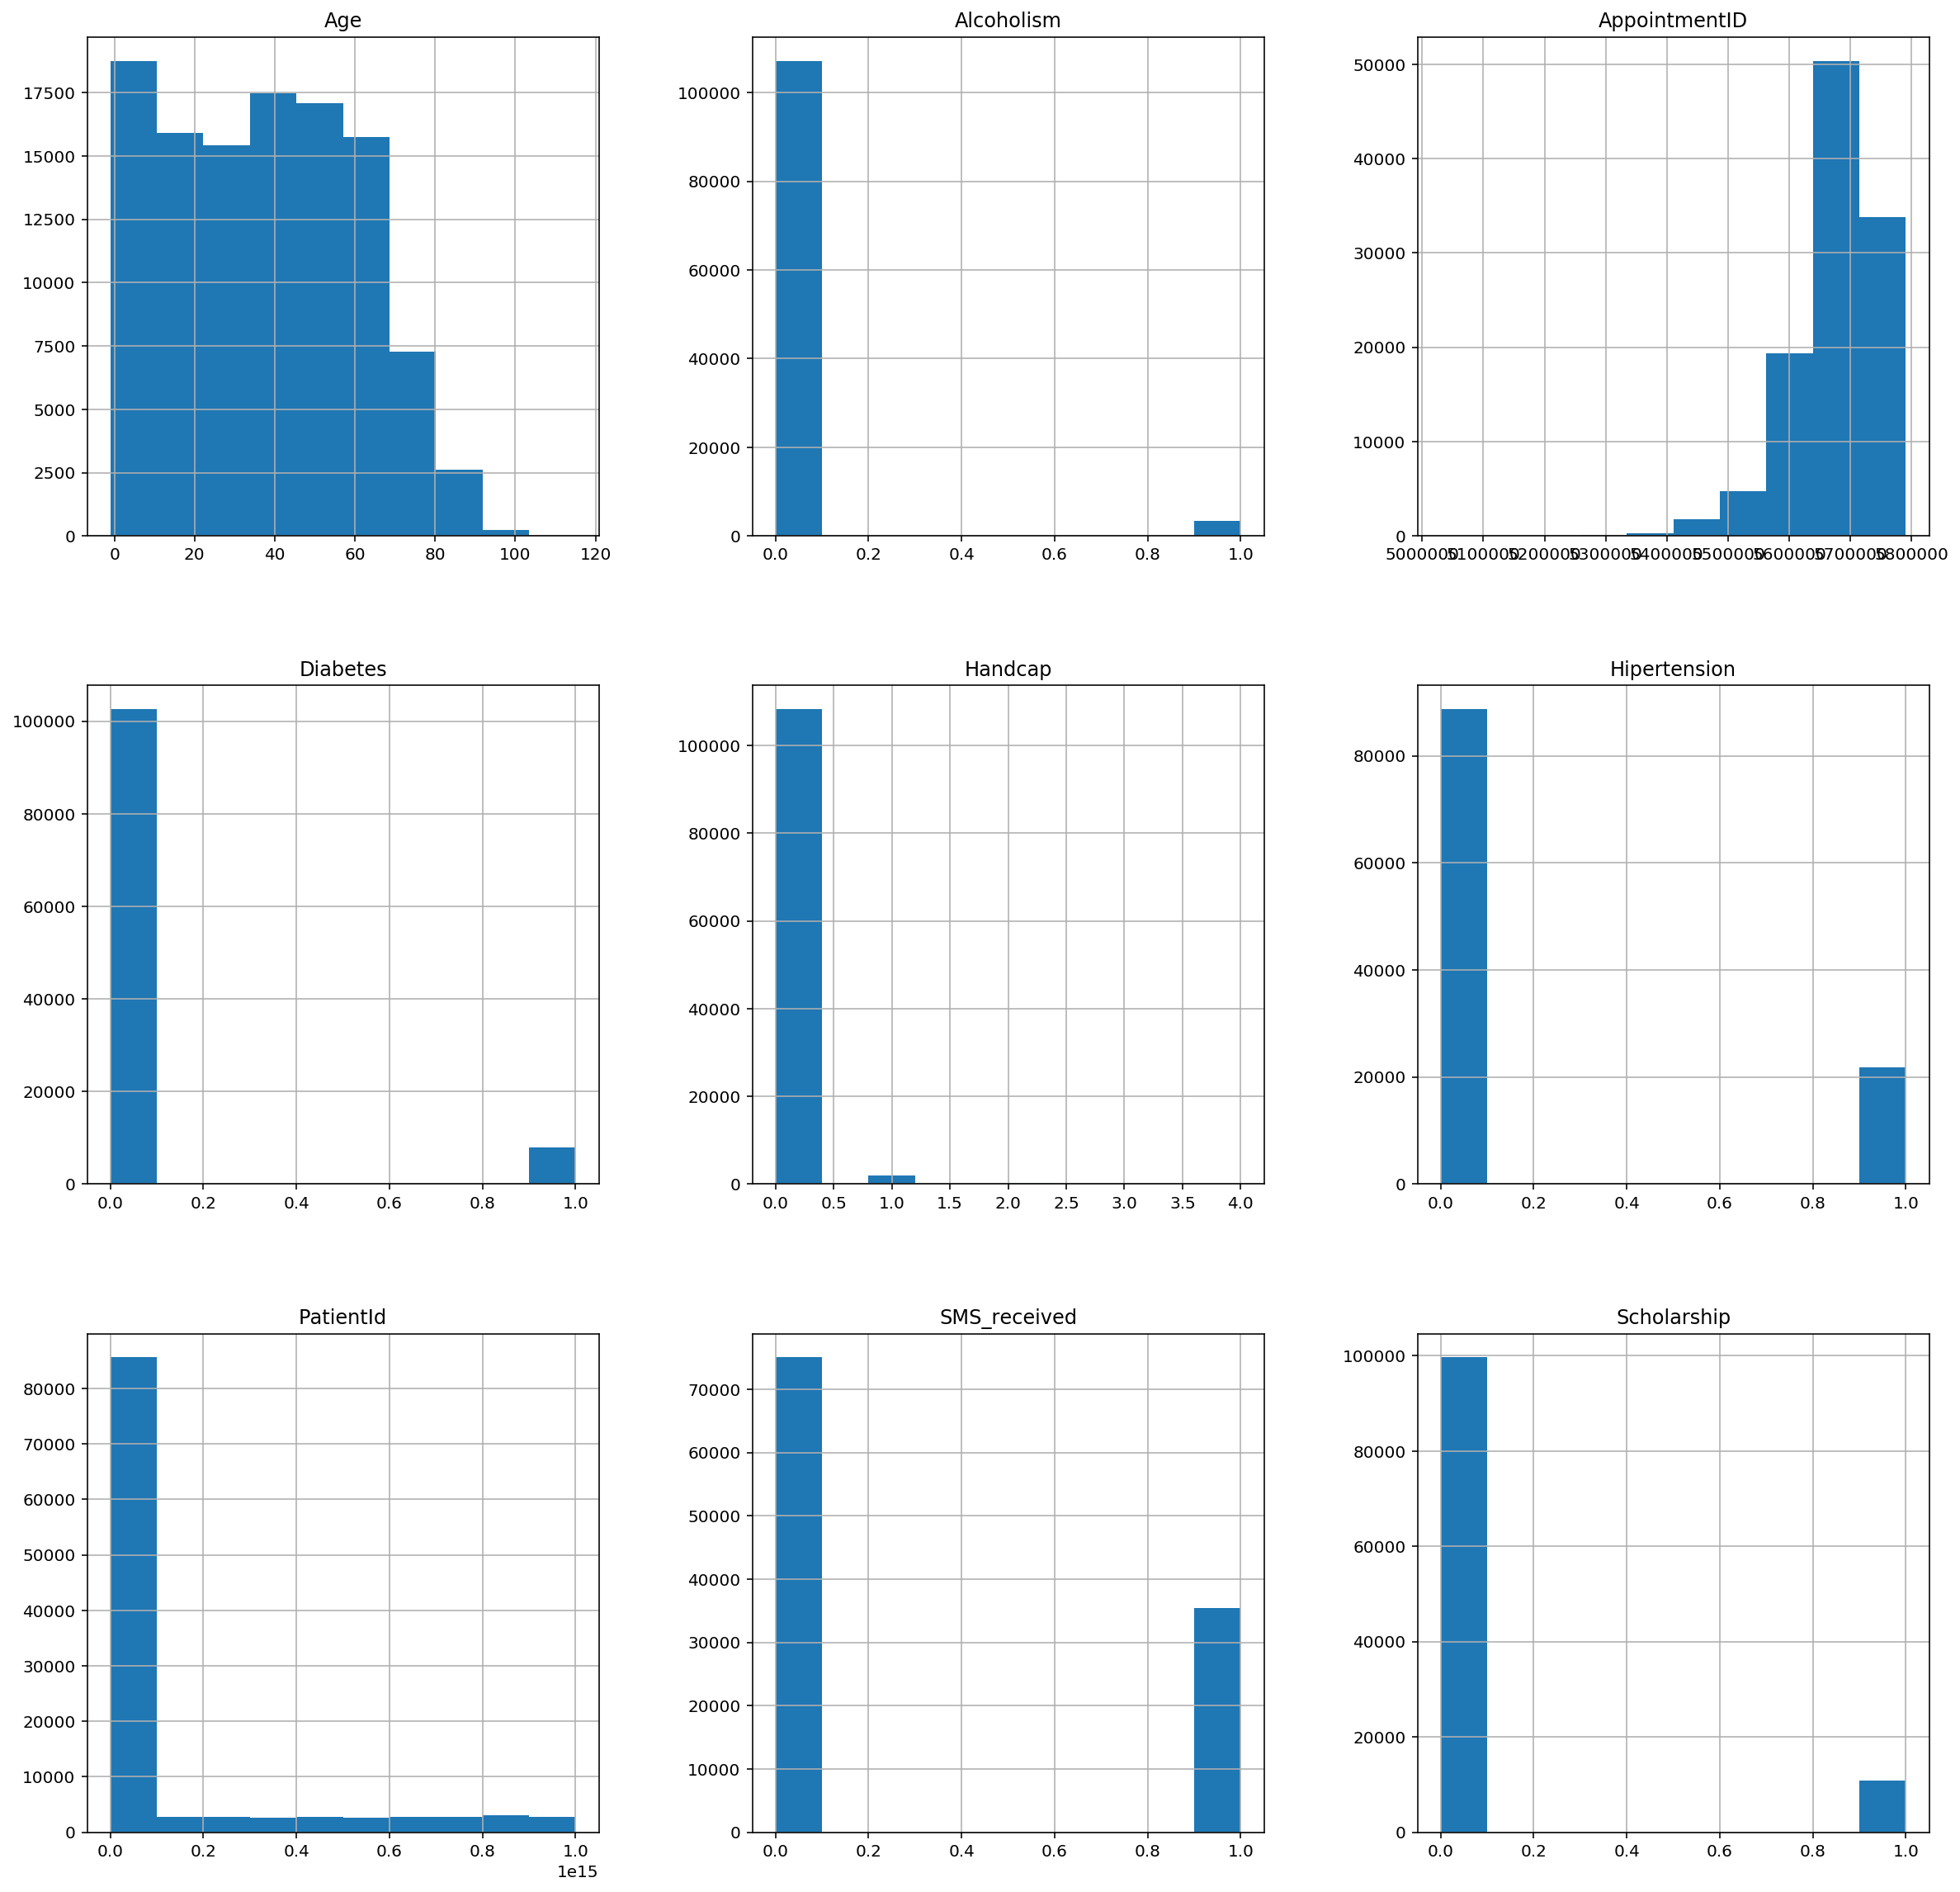

In [10]:
#Inspect the distribution of features in the dataset.

df_data.hist(figsize=(20,20));

### Observations

>- There are 110,527 entries and 14 features in the DataSet.

>- The Data type of No-show should be changed to 'int64' after replacing (Yes and No) with (0 and 1)

>- The Data type of PatientID and AppointmentID should be converted to 'strings' since they add no numerical value to the Analysis.

>- The Data type of ScheduledDay and AppointmentDay should be converted to datetime.

>- All column names should be in lowercase and 'Hipertension', 'Handcap' and 'No-show' should be renamed to 'Hypertension', 'Handicap' and 'No_show' respectively.

>- There are no duplicates in the DataSet.

>- There are no null values in the Dataset.

>- Handcap has 5 unique values and Should be changed to 2 unique values i.e 1 rep people who are handicap while 0 rep people who are not handicap.

>- According to the histogram, Age is distributed normally with the mean_age being ewual to the median_age (37yrs)..

>- Maximum age is 115 and Minimum age is -1 (an error which must be dropped since Age cannoy be Negative)

>- 75% of patients are younger or equal to 55 while the 4th quartile comprises of old patients.

### Data Cleaning

> After accessing the DataSet, we discovered some errors in structure, Data type and features. These irregularities need to be cleaned or dropped before we can perform Exploratory Data Analysis using our research question.

In [11]:
#Modifying the No-show feature (Yes= 0 , No= 1)

df_data["No-show"].replace({"Yes":0, "No":1}, inplace= True)

In [12]:
#Fixing Datatypes

df_data["No-show"]= df_data["No-show"].astype('int64')

df_data["ScheduledDay"]= pd.to_datetime(df_data["ScheduledDay"])

df_data["AppointmentDay"]= pd.to_datetime(df_data["AppointmentDay"])

df_data["PatientId"]= df_data["PatientId"].astype('str')

df_data["AppointmentID"]= df_data["AppointmentID"].astype('str')

In [13]:
#Rename columns

df_data.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace= True)

#Change column names to lowercase

df_data.rename(columns= lambda x:x.strip().lower().replace("-","_"), inplace= True)

In [14]:
#View the handicap feature to inspect unique values

df_data.groupby("handicap").sum()

age  scholarship  hypertension  diabetes  alcoholism  \
handicap                                                             
0         3986058        10683         20833      7544        3282   
1          103846          160           883       356          70   
2            8743           18            84        43           5   
3             632            0             1         0           3   
4              43            0             0         0           0   

          sms_received  no_show  
handicap                         
0                34946    86374  
1                  489     1676  
2                   43      146  
3                    3       10  
4                    1        2

In [15]:
#Modify the handicap feature

df_data["handicap"].replace({2:1, 3:1, 4:1}, inplace= True)

In [16]:
#Confirmation of Datatype and column names modifications

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 11.8+ MB


In [17]:
#Confirmation of handicap feature modification

df_data.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               2
sms_received           2
no_show                2
dtype: int64

In [18]:
#Sort out the incorrect row(s) from the age feature and drop it.

wrong_age= df_data.query('age < 0')
df_data.drop(wrong_age.index, inplace= True)

In [19]:
#Confirmation of age modification

df_data["age"].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

##### Result

>- Incorrect datatypes have been changed to the correct form.

>- Column names have been changed to lowercase and all "-" replaced with "_".

>- Incorrect column names have been corrected.

>- Handicap feature has been modified to two unique values as opposed to the previous five unique values.

>- Incorrect entry for 'age' has been sorted and dropped and our dataset thoroughly cleaned.

<a id='eda'></a>
## Exploratory Data Analysis

> Before we carry out the Exploratory Data Analysis using the research questions, We need to get a quick insight of the relationship between Numerical variables




In [20]:
#Getting quick insight of the relationship between numerical values

df_data.corr()

age  scholarship  hypertension  diabetes  alcoholism  \
age           1.000000    -0.092463      0.504586  0.292391    0.095810   
scholarship  -0.092463     1.000000     -0.019730 -0.024894    0.035022   
hypertension  0.504586    -0.019730      1.000000  0.433085    0.087970   
diabetes      0.292391    -0.024894      0.433085  1.000000    0.018473   
alcoholism    0.095810     0.035022      0.087970  0.018473    1.000000   
handicap      0.083742    -0.009104      0.084851  0.059144    0.003692   
sms_received  0.012633     0.001192     -0.006270 -0.014552   -0.026149   
no_show       0.060327    -0.029134      0.035704  0.015181    0.000197   

              handicap  sms_received   no_show  
age           0.083742      0.012633  0.060327  
scholarship  -0.009104      0.001192 -0.029134  
hypertension  0.084851     -0.006270  0.035704  
diabetes      0.059144     -0.014552  0.015181  
alcoholism    0.003692     -0.026149  0.000197  
handicap      1.000000     -0.025221  0.007281  
sms_received -0.025221      1.000000 -0.126428  
no_show       0.007281     -0.126428  1.000000

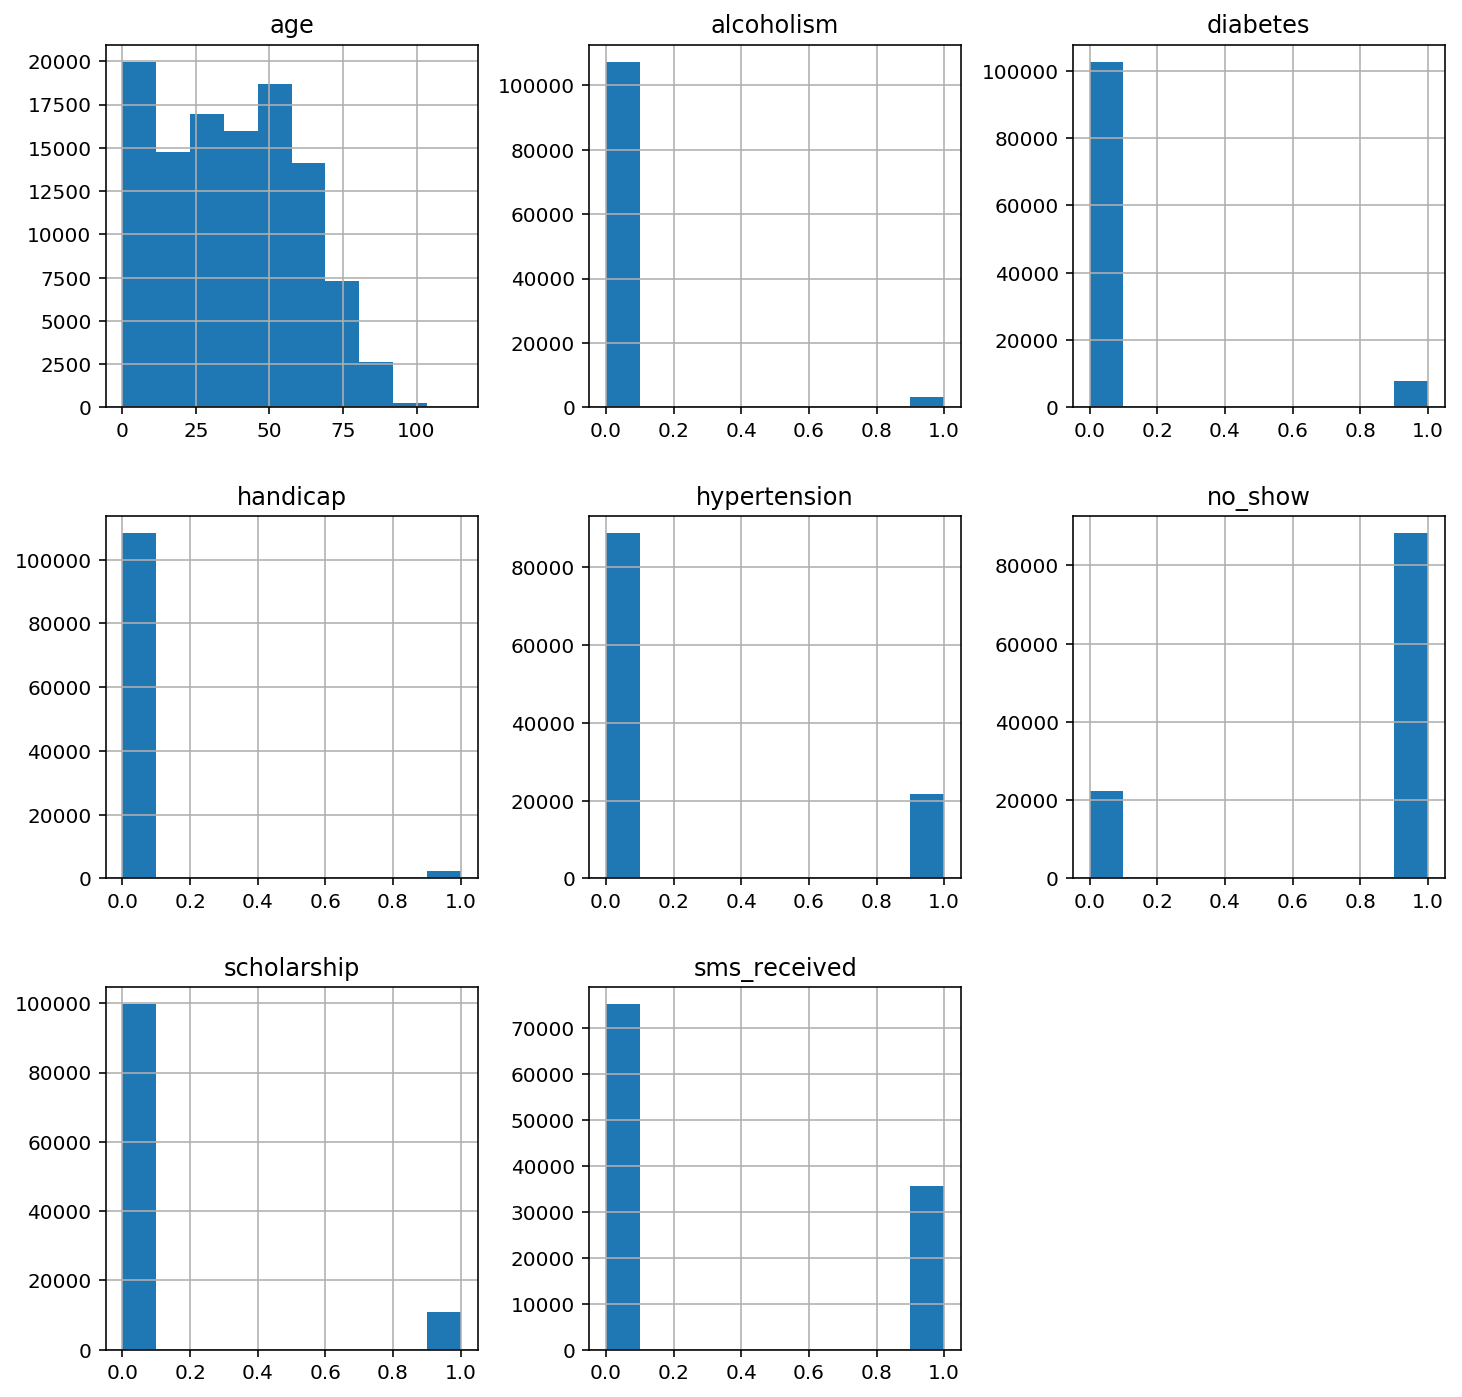

In [21]:
#View distribution of Numerical features

df_data.hist(figsize= (12,12));

### Research Question 1:

#### Is alcohol responsible for missing out on appointments?

> First, we have to sort of rows where alcoholic patients showed up for appointments and rows where alcoholic patients didn't show up for appointment.

> Then we plot a bar chart using matplotlib


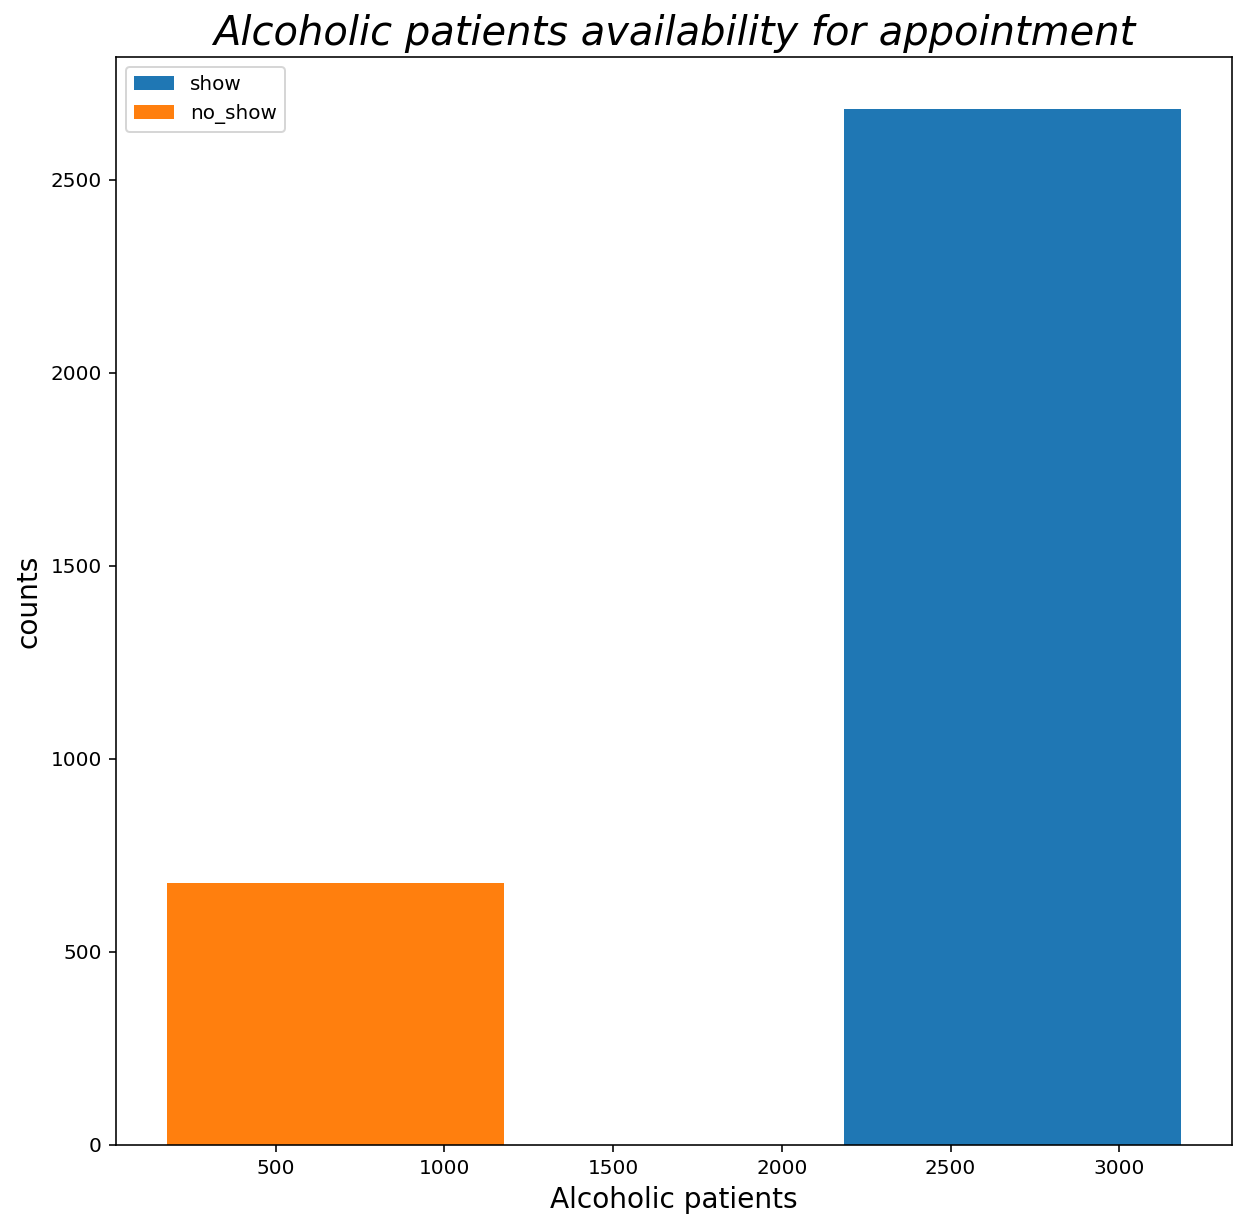

In [22]:
# Sort out rows where alcoholic patients showed up for appointments 
#and rows where alcoholic patients didn't show up for appointment.

alco_show = df_data.query('alcoholism == 1 & no_show == 1').count()
alco_no_show= df_data.query('alcoholism == 1 & no_show == 0').count()
height1= alco_show['patientid'].mean()
height2= alco_no_show['patientid'].mean()
 

# Plot a bar chart to display relationship.

fig,ax= plt.subplots(figsize=(10,10))
ax.bar(alco_show['patientid'].mean(), height= height1, width= 1000, label= 'show')
ax.bar(alco_no_show['patientid'].mean(), height= height2, width= 1000, label= 'no_show')
ax.set_title('Alcoholic patients availability for appointment', style= 'italic', size= 20)
ax.set_xlabel('Alcoholic patients', size= 14)
ax.set_ylabel('counts', size= 14)
ax.legend(loc= 'upper left')
plt.show()

In [23]:
#Total number of alcoholic patients

total_alco= df_data.query('alcoholism == 1').count()['patientid']
print(total_alco)

3360


In [24]:
#Number of Alcoholic patients that showed for appointment and their relative percentage

alco_show['patientid'], (alco_show['patientid'] * (100/total_alco )).round(2)

(2683, 79.849999999999994)

In [25]:
#Number of Alcoholic patients that didnt show for appointment and their relative percentage

alco_no_show['patientid'], (alco_no_show['patientid'] * (100/total_alco)).round(2)

(677, 20.149999999999999)

### Research Question 2 :


#### Which Neighborhood recorded the most Appointments

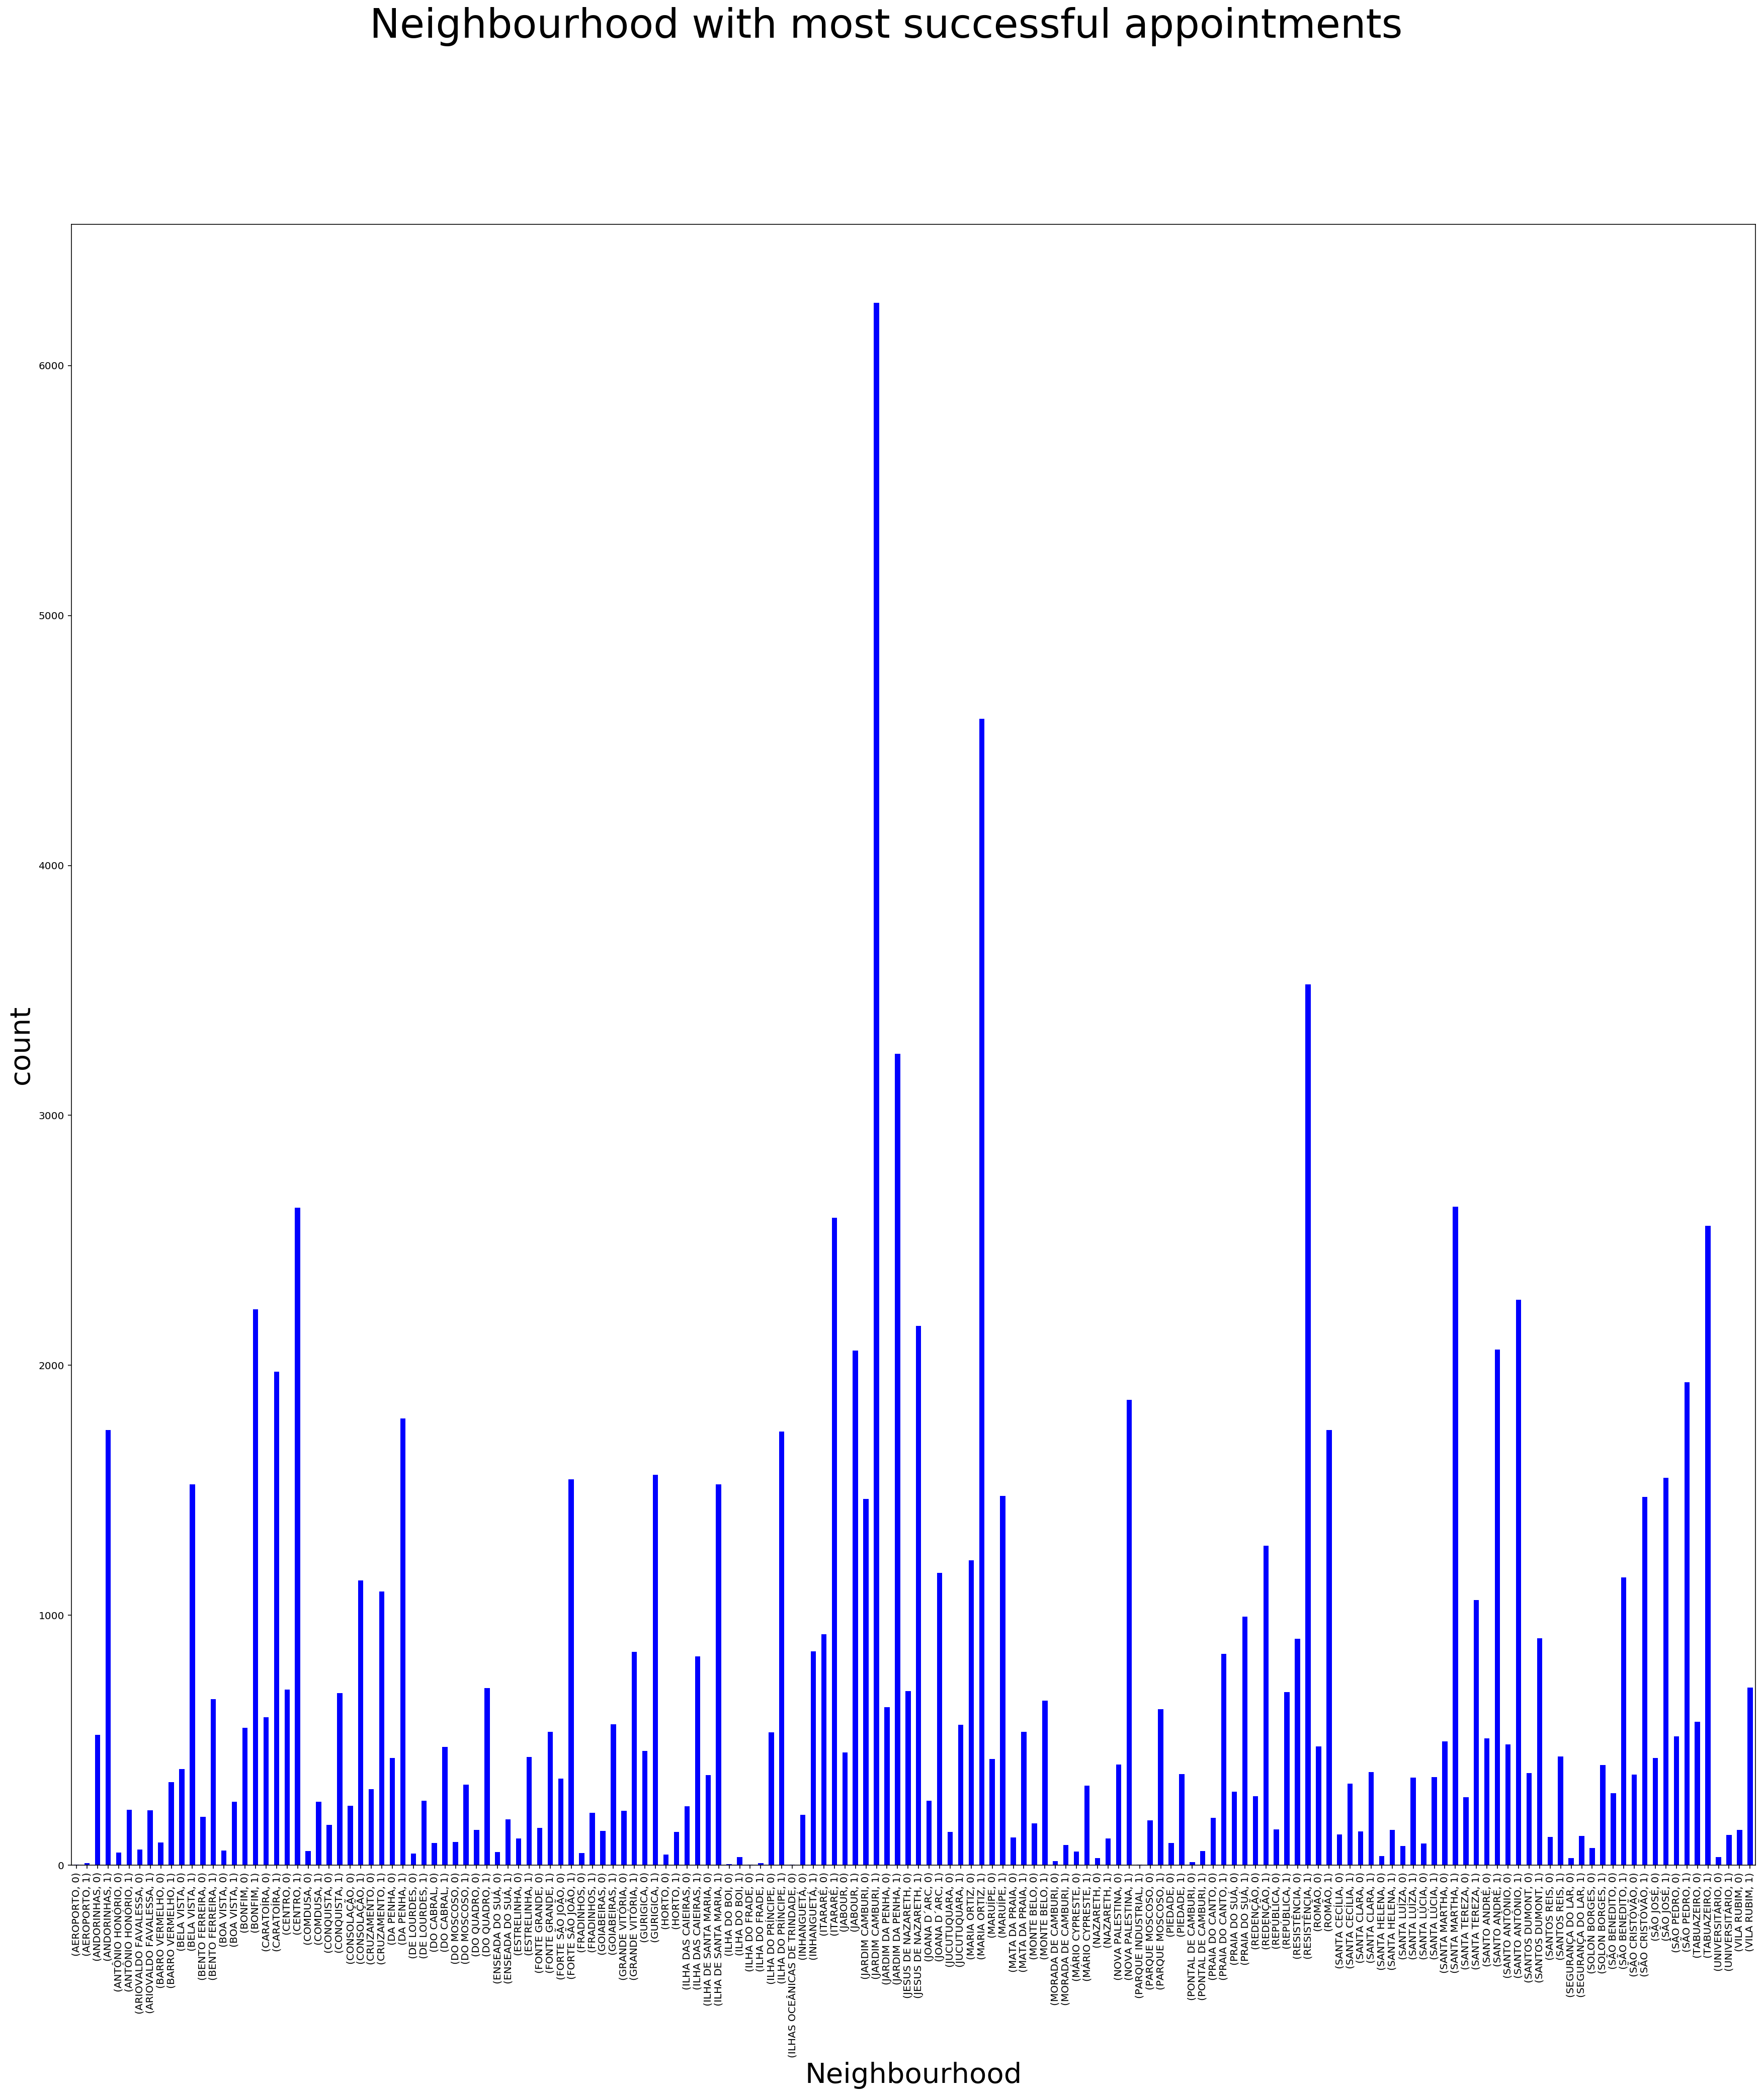

In [26]:
# Group Data by Neighborhood and No_show 
# Plot a pie chart showing the relationship

df_data.groupby(['neighbourhood' , 'no_show']).count()['patientid'].plot(kind= 'bar', color= 'b' , figsize= (30,30))
plt.suptitle('Neighbourhood with most successful appointments', size= 40)
plt.xlabel('Neighbourhood', size= 28)
plt.ylabel('count', size= 28)
plt.show()

### Research Question 3:

#### Do the duration between registration and appointment affect the ability to show up?


> First, we create a new column containing the difference between the scheduledday and appointmentday.

> We inspect the Average days needed for a patient to show for appointment or not show for appointment.

> We plot a pie chart based  on the average days to know how many patients fall under each category

In [27]:
#To get the duration, we need to create a new column from the difference between the 'scheduledday' and the 'appointmentday' features

df_data['duration']= df_data['appointmentday'].dt.date - df_data['scheduledday'].dt.date
df_data['duration']= df_data['duration'].dt.days  #Extract day values 
df_data.head(10)  #inspect first 10 rows

patientid appointmentid gender        scheduledday appointmentday  \
0  2.98724998243e+13       5642903      F 2016-04-29 18:38:08     2016-04-29   
1  5.58997776694e+14       5642503      M 2016-04-29 16:08:27     2016-04-29   
2  4.26296229995e+12       5642549      F 2016-04-29 16:19:04     2016-04-29   
3     867951213174.0       5642828      F 2016-04-29 17:29:31     2016-04-29   
4  8.84118644818e+12       5642494      F 2016-04-29 16:07:23     2016-04-29   
5  9.59851332313e+13       5626772      F 2016-04-27 08:36:51     2016-04-29   
6  7.33688164477e+14       5630279      F 2016-04-27 15:05:12     2016-04-29   
7  3.44983339412e+12       5630575      F 2016-04-27 15:39:58     2016-04-29   
8    5.639472995e+13       5638447      F 2016-04-29 08:02:16     2016-04-29   
9  7.81245643693e+13       5629123      F 2016-04-27 12:48:25     2016-04-29   

   age      neighbourhood  scholarship  hypertension  diabetes  alcoholism  \
0   62    JARDIM DA PENHA            0             1         0           0   
1   56    JARDIM DA PENHA            0             0         0           0   
2   62      MATA DA PRAIA            0             0         0           0   
3    8  PONTAL DE CAMBURI            0             0         0           0   
4   56    JARDIM DA PENHA            0             1         1           0   
5   76          REPÚBLICA            0             1         0           0   
6   23         GOIABEIRAS            0             0         0           0   
7   39         GOIABEIRAS            0             0         0           0   
8   21         ANDORINHAS            0             0         0           0   
9   19          CONQUISTA            0             0         0           0   

   handicap  sms_received  no_show  duration  
0         0             0        1         0  
1         0             0        1         0  
2         0             0        1         0  
3         0             0        1         0  
4         0             0        1         0  
5         0             0        1         2  
6         0             0        0         2  
7         0             0        0         2  
8         0             0        1         0  
9         0             0        1         2

In [28]:
# First, lets see the Average days a patient needs to show up for appointments or not.

avg_day= df_data.groupby('no_show')['duration'].mean().round(2)
print(avg_day)

no_show
0    15.83
1     8.75
Name: duration, dtype: float64


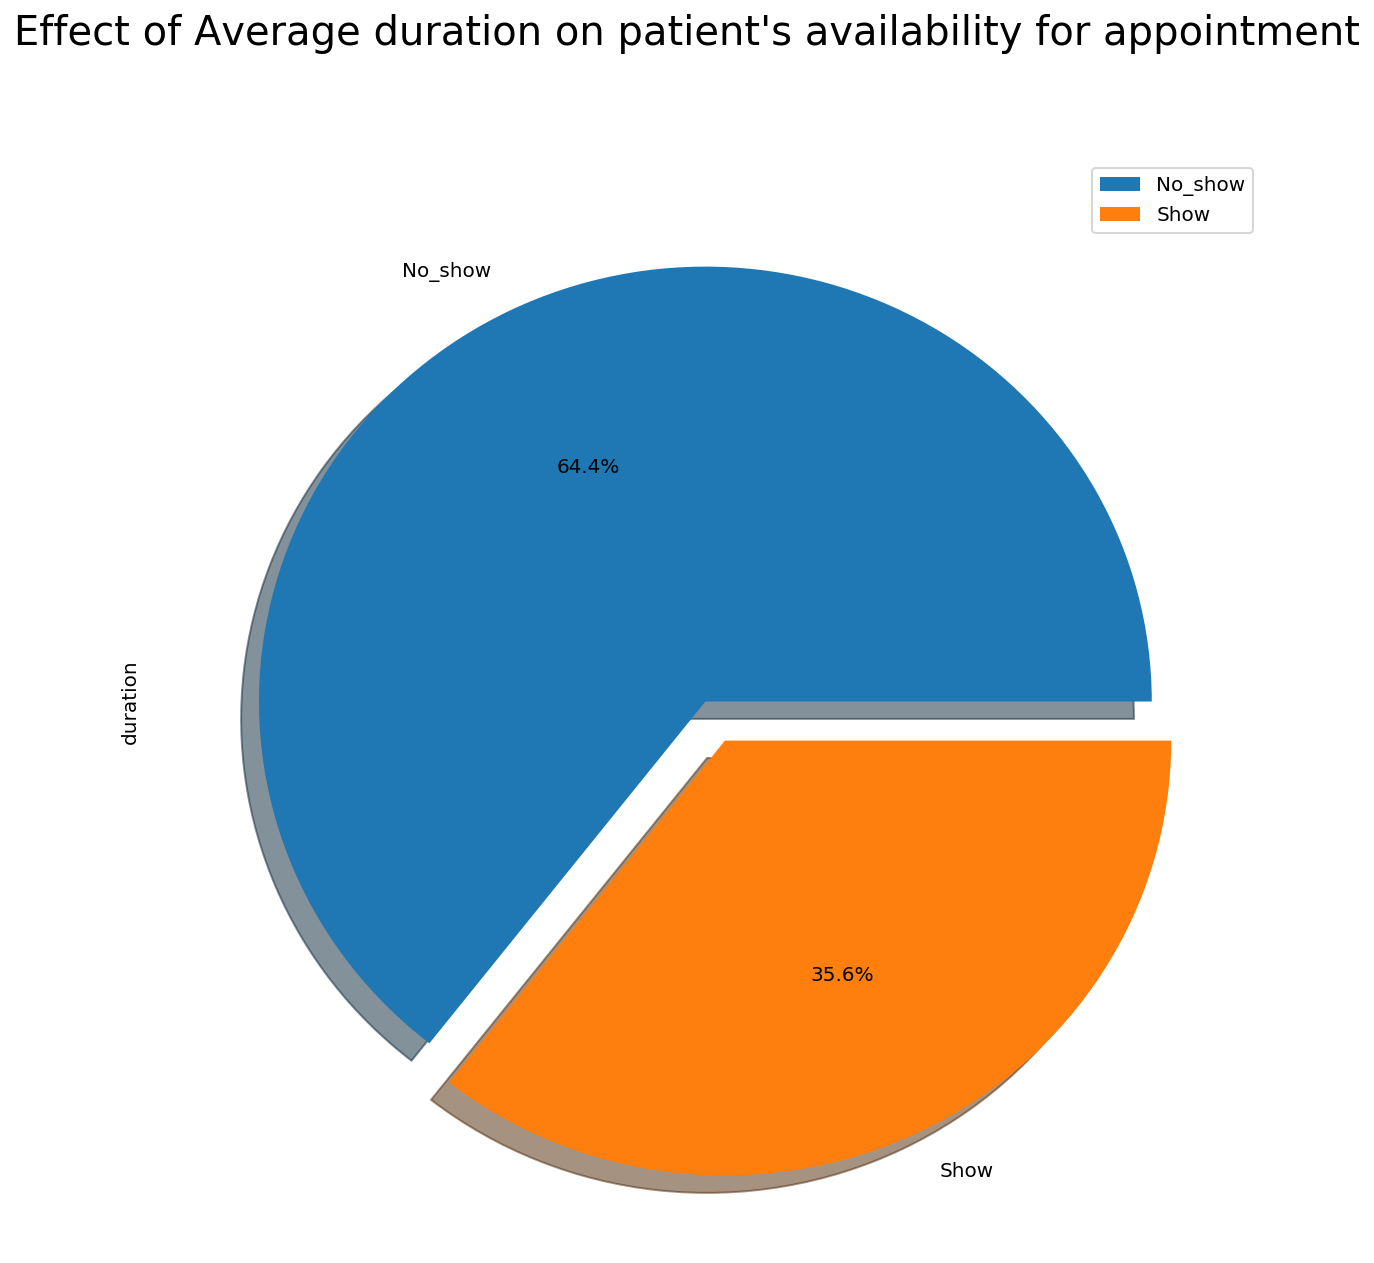

In [29]:
# We plot using a pie chart since we have two categories of data(Show and No show)

df_data.groupby('no_show')['duration'].mean().plot(kind= 'pie', labels= ['No_show', 'Show'], figsize= (10,10), explode= [0,0.1], shadow= True, autopct= '%1.1f%%')
plt.suptitle("Effect of Average duration on patient's availability for appointment", size= 20)
plt.legend()
plt.show()

### Research Question 4:


### Male or Female. Which is more likely to show up for appointment?


> We sort out rows based on gender to know the number of patients for each gender that showed up for appointment or those that didnt.

> We visualize the data using  an horizontal bar chart from matplotlib.

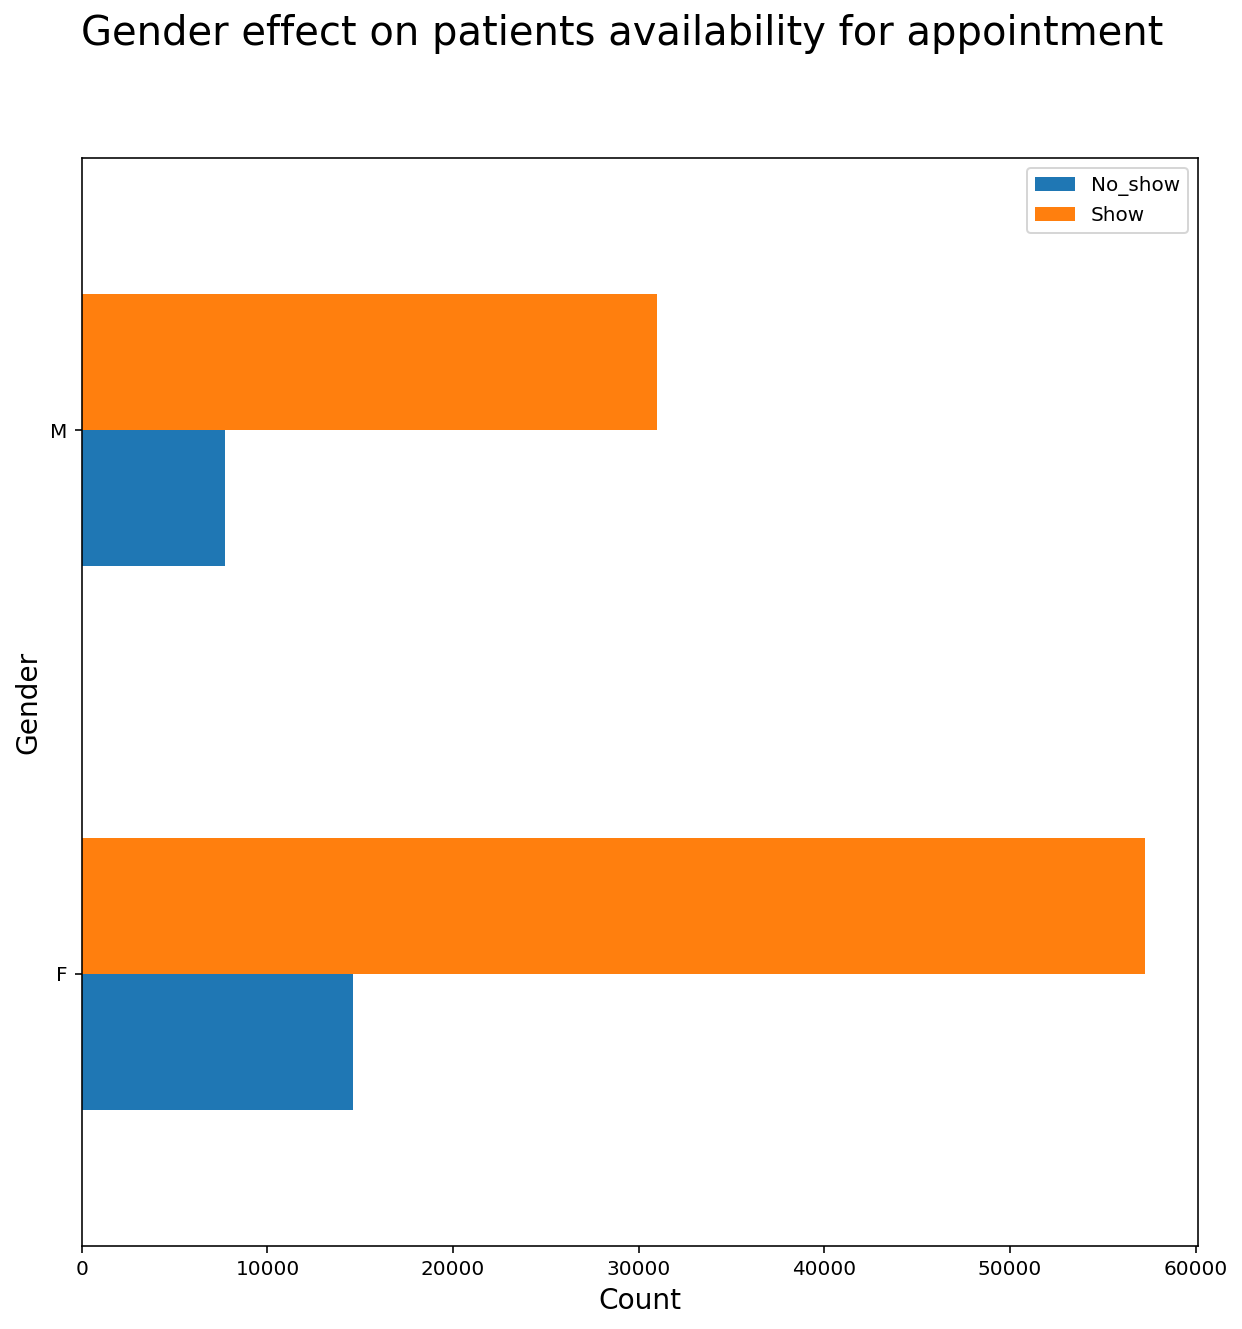

In [30]:
# sort out rows based on gender to know the number of patients for each gender 
#that showed up for appointment or those that didnt.

df_data.groupby(['gender','no_show']).count()['patientid'].unstack().plot(kind= 'barh', figsize= (10,10), stacked= False)
plt.suptitle('Gender effect on patients availability for appointment', size= 20)
plt.xlabel('Count', size= 14)
plt.ylabel('Gender', size= 14)
plt.legend(['No_show', 'Show'])
plt.show()

In [31]:
# Total Number of Male and Female
male_total= df_data.query('gender == "M"').count()['patientid']

female_total= df_data.query('gender == "F"').count()['patientid']

print('Male_Total: ', male_total, ',', 'Female_Total: ', female_total)

Male_Total:  38687 , Female_Total:  71839


In [33]:
# Number and Percentage of Men that showed up for appointment

male_show= df_data.query('gender == "M" & no_show == 1').count()['patientid']

def percent(x,y):
    return (x * (100/y)).round(2)

male_percent= percent(male_show, male_total)

female_show= df_data.query('gender == "F" & no_show == 1').count()['patientid']

female_percent= percent(female_show, female_total)

print('A total of {} Male and {} Female showed up for their appointment, each having percentage of {} and {} respectively'.format(male_show,female_show,male_percent,female_percent))


A total of 30962 Male and 57245 Female showed up for their appointment, each having percentage of 80.03 and 79.69 respectively


### Research Question 5:


### Do Age influence the ability to show up for appointments?


> First, we inspect the age data to get the descriptive statistics.

> Then we categorize the age data using pandas cut function and save the categorical data in a new column

> We get the age count(for each category) of patients that showed up for appointment and those that didn't

> We sort data by category and plot a bar chart using matplotlib.

In [34]:
# inspect the age data to get the descriptive statistics.

df_data['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [35]:
# categorize the age data using pandas cut function 
# and save the categorical data in a new column

bin_edges= [0.0, 18.0, 37.0, 55.0, 115.0]
bin_names= ['Child', 'Youth', 'Mid_Age', 'Old_Age']
df_data['age_grade']= pd.cut(df_data['age'], bin_edges, labels= bin_names)
df_data.head()  #inspect first five rows

patientid appointmentid gender        scheduledday appointmentday  \
0  2.98724998243e+13       5642903      F 2016-04-29 18:38:08     2016-04-29   
1  5.58997776694e+14       5642503      M 2016-04-29 16:08:27     2016-04-29   
2  4.26296229995e+12       5642549      F 2016-04-29 16:19:04     2016-04-29   
3     867951213174.0       5642828      F 2016-04-29 17:29:31     2016-04-29   
4  8.84118644818e+12       5642494      F 2016-04-29 16:07:23     2016-04-29   

   age      neighbourhood  scholarship  hypertension  diabetes  alcoholism  \
0   62    JARDIM DA PENHA            0             1         0           0   
1   56    JARDIM DA PENHA            0             0         0           0   
2   62      MATA DA PRAIA            0             0         0           0   
3    8  PONTAL DE CAMBURI            0             0         0           0   
4   56    JARDIM DA PENHA            0             1         1           0   

   handicap  sms_received  no_show  duration age_grade  
0         0             0        1         0   Old_Age  
1         0             0        1         0   Old_Age  
2         0             0        1         0   Old_Age  
3         0             0        1         0     Child  
4         0             0        1         0   Old_Age

In [36]:
# get the age count(for each category) of patients that showed up 
# for appointment and those that didn't

age_count= df_data.groupby(['age_grade', 'no_show']).count()['patientid']
print(age_count)

age_grade  no_show
Child      0           5708
           1          19619
Youth      0           6414
           1          20836
Mid_Age    0           5255
           1          21651
Old_Age    0           4303
           1          23201
Name: patientid, dtype: int64


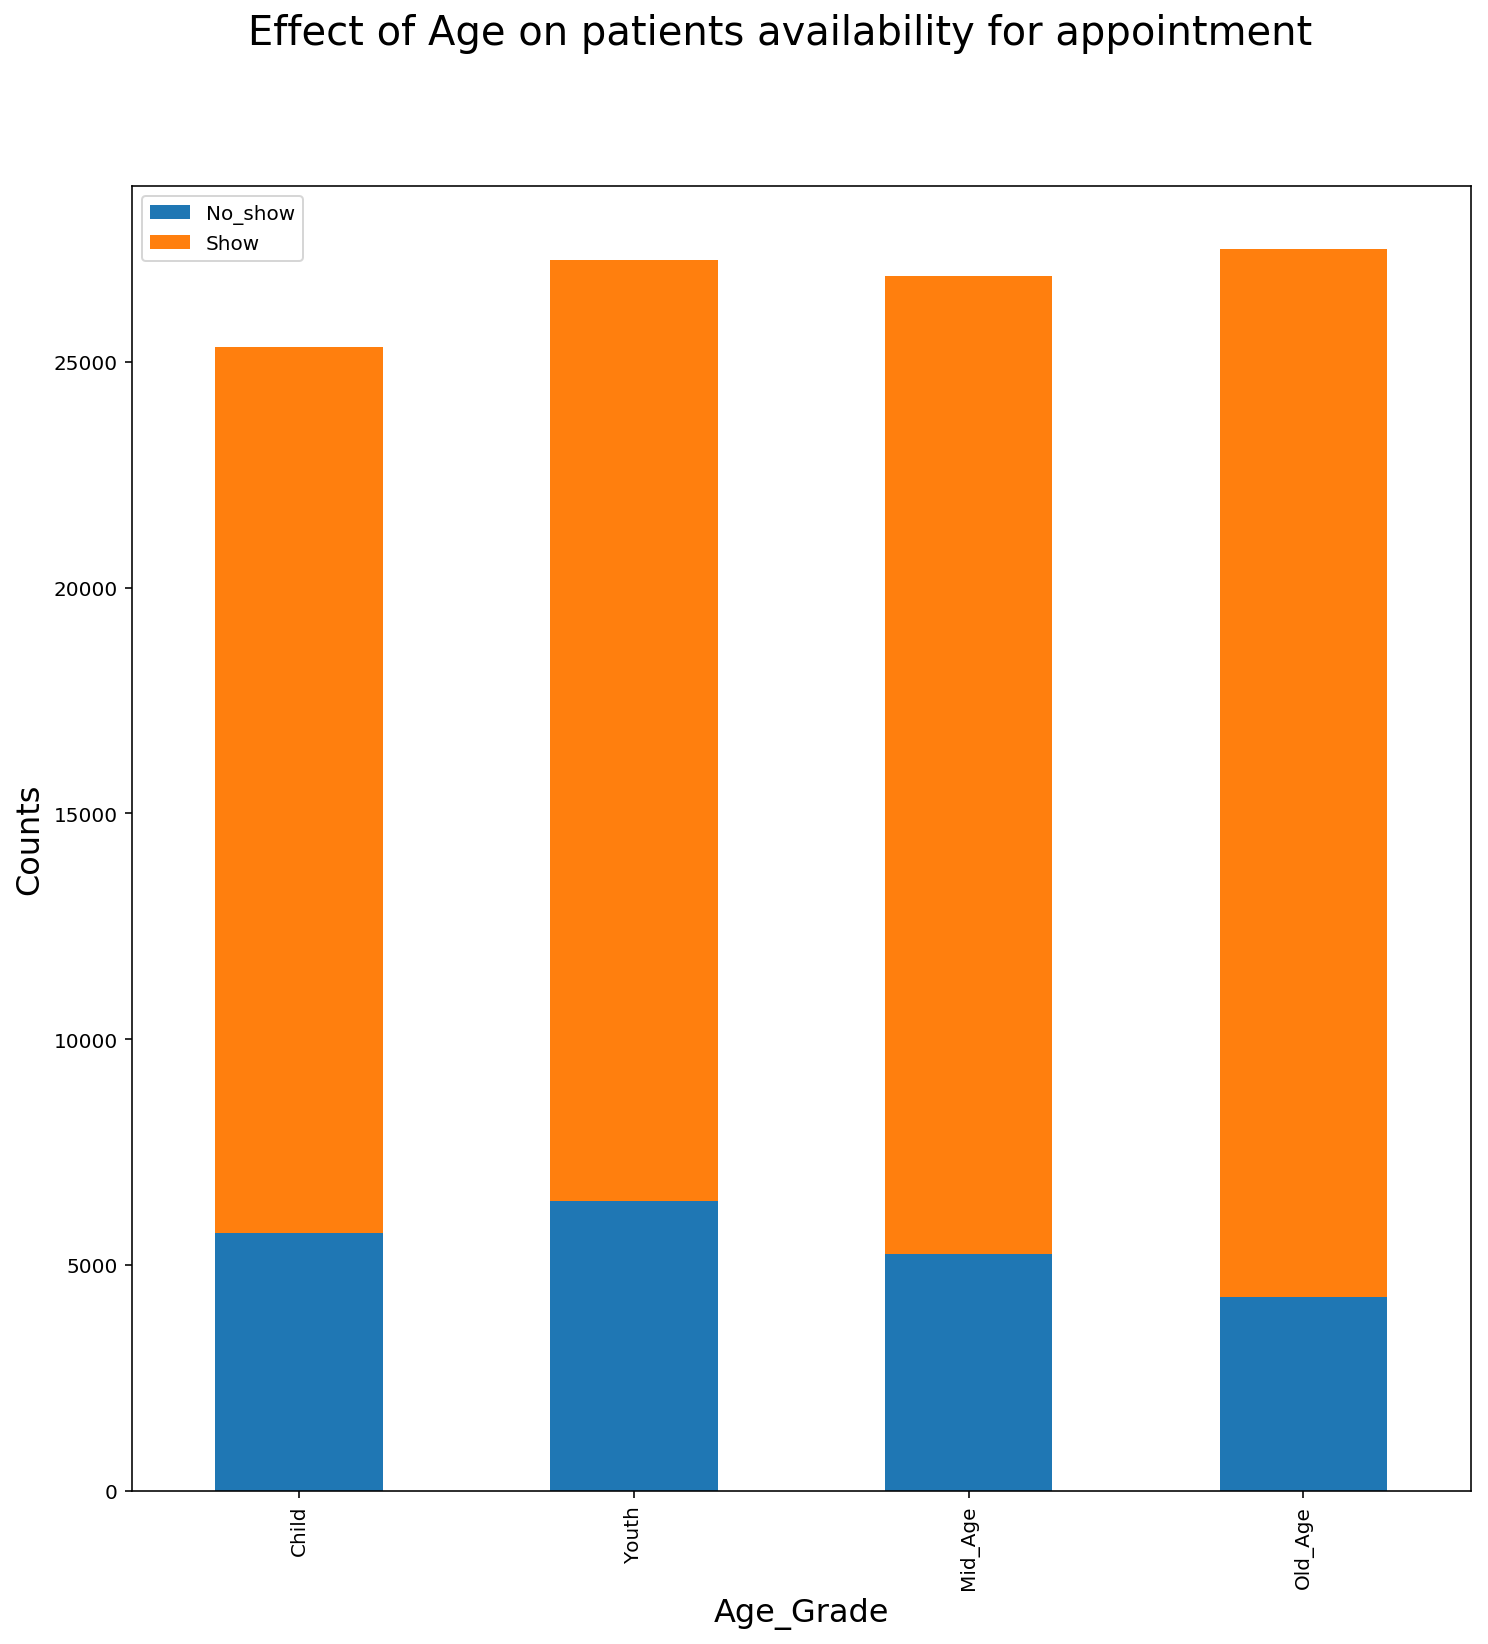

In [37]:
# sort data by category 
# and plot a bar chart using matplotlib.

df_data.groupby(['age_grade', 'no_show']).count()['patientid'].unstack().plot(kind= 'bar', figsize= (12,12), stacked= True)
plt.suptitle('Effect of Age on patients availability for appointment', size= 20)
plt.xlabel('Age_Grade', size= 16)
plt.ylabel('Counts', size= 16)
plt.legend(['No_show','Show'])
plt.show()          

> From the chart above, 19619 patients within the age (0-18)(child) showed up for their appointment as against the total number being 25327. 

> 20836 patients within the age (18-37)(youth) showed up for their appointment as against the total number being 27250. 

> 21651 patients within the age (37-55)(Mid_age) showed up for their appointment as against the total number being 26906

> 23201 patients within the age (55-115)(Old_age) showed up for their appointment as against the total number being 27504

<a id='conclusions'></a>
## Conclusions

### Result of Analysis

> Alcohol is not a major reason why patients do not show up for appointments as 79.85% of Alcoholic patients showed up for appointments out of the 3360 Alcoholic patients registered.


> The Neighborhood with most appointments is JARDIM CAMBURI with over 6000 successful appointments.


> It is evident that the average waiting duration between the scheduled day and day of appointment for a patient to show up is between 8-9days while the average waiting duration for a patient to not show up is 15-16days.


> 35.6% of patients who showed up for appointment had an average waiting duration of 8-9days as against the 64.4% of patients who didn't show up for appointment with an average waiting duration of 15-16days.


> It is evident that despite the large number of female patients, Both male and female patients have equal commitment to appointments. Both Gender had approx. 80% show ups for appointments.


> It is clear that age do not influence the ability to show up as all age grades showed similar commitment to appointments. However, People within the age bracket (18 - 37)(youths) tend to not show up for appointments the most, while Old_aged people (57 - 115) had the smallest number of people not showing up for appointments.


> Limitations were encountered in  working with some features and in the visualization of relationship between features. We had a 'Non-categorical' feature('age) being converted to a 'Categorical' feature('age_grade') for a well detailed analysis to be done.


> For the successful completion of this project, references were made from "www.Stack_Overflow.com" and "www.kaggle.com"


